/Users/rakshitmadan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizations for Cluster 0:



/var/folders/gb/mqpz2ngd34j260hplkk3g87h0000gn/T/ipykernel_17173/2141503643.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = clusters


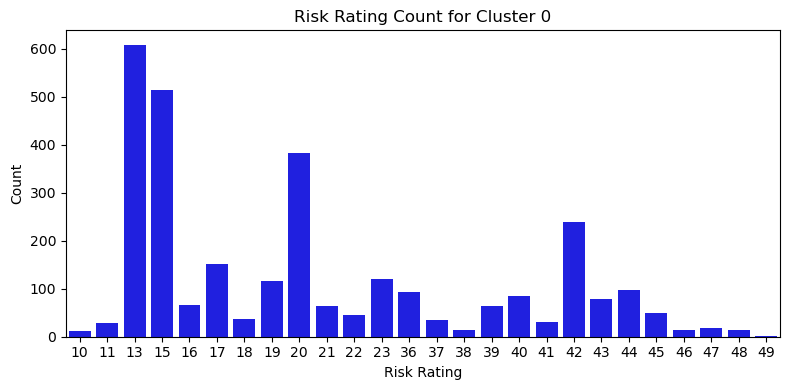

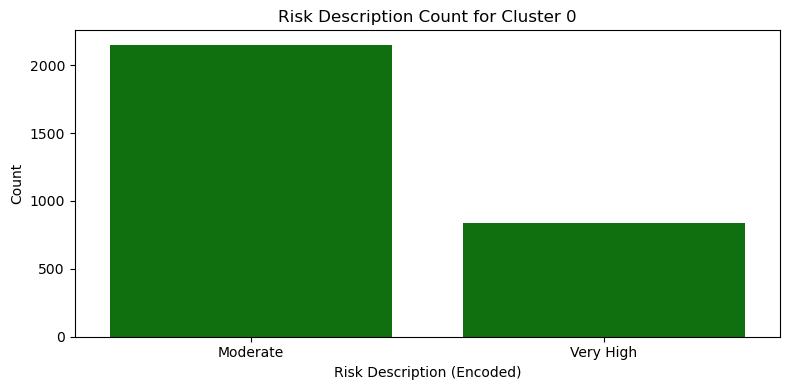

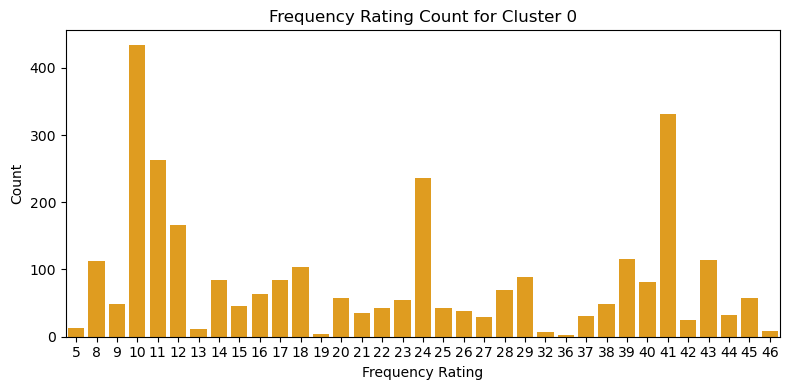

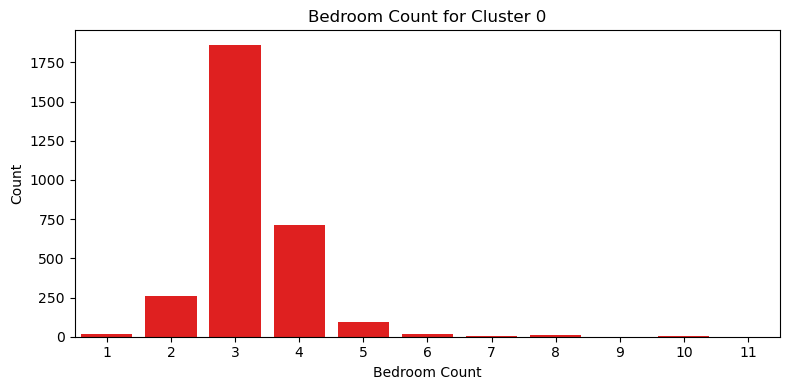

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylab'

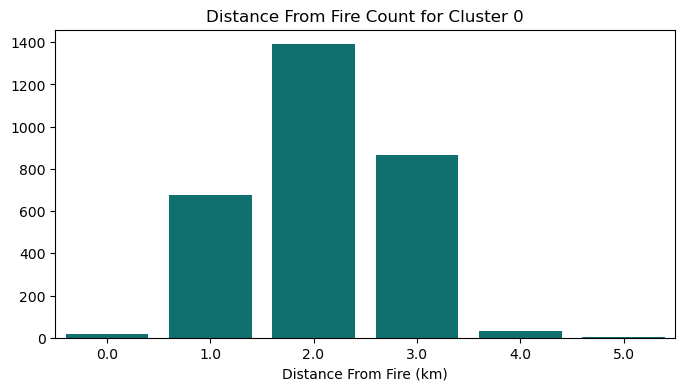

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_excel("Main Dataset.xlsx")

# Select relevant columns
columns_of_interest = [
    'RiskRating', 
    'RiskDescription', 
    'FrequencyRating', 
    'BedroomCount', 
    'Distance From Fire (km)', 
    'BuildingType'
]
data_subset = data[columns_of_interest]

# Encode categorical variables
data_for_clustering = data_subset.copy()
data_for_clustering['RiskDescription'] = data_for_clustering['RiskDescription'].astype('category').cat.codes
data_for_clustering['BuildingType'] = data_for_clustering['BuildingType'].astype('category').cat.codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Apply K-means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data subset
data_subset['Cluster'] = clusters

# Visualize each characteristic for each cluster
for cluster in range(optimal_clusters):
    cluster_data = data_subset[data_subset['Cluster'] == cluster]
    print(f"Visualizations for Cluster {cluster}:\n")
    
    # 1. Bar plot for 'RiskRating'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_data['RiskRating'].value_counts().index, 
                y=cluster_data['RiskRating'].value_counts().values, color='blue')
    plt.title(f"Risk Rating Count for Cluster {cluster}")
    plt.xlabel("Risk Rating")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 2. Bar plot for 'RiskDescription'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_data['RiskDescription'].value_counts().index, 
                y=cluster_data['RiskDescription'].value_counts().values, color='green')
    plt.title(f"Risk Description Count for Cluster {cluster}")
    plt.xlabel("Risk Description (Encoded)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 3. Bar plot for 'FrequencyRating'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_data['FrequencyRating'].value_counts().index, 
                y=cluster_data['FrequencyRating'].value_counts().values, color='orange')
    plt.title(f"Frequency Rating Count for Cluster {cluster}")
    plt.xlabel("Frequency Rating")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 4. Bar plot for 'BedroomCount'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_data['BedroomCount'].value_counts().index, 
                y=cluster_data['BedroomCount'].value_counts().values, color='red')
    plt.title(f"Bedroom Count for Cluster {cluster}")
    plt.xlabel("Bedroom Count")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 5. Bar plot for 'Distance From Fire (km)'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_data['Distance From Fire (km)'].round().value_counts().index, 
                y=cluster_data['Distance From Fire (km)'].round().value_counts().values, color='teal')
    plt.title(f"Distance From Fire Count for Cluster {cluster}")
    plt.xlabel("Distance From Fire (km)")
    plt.ylab


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_excel("Main Dataset.xlsx")

# Select relevant columns, including LAT and LON for further analysis
columns_of_interest = [
    'RiskRating', 
    'RiskDescription', 
    'FrequencyRating', 
    'BedroomCount', 
    'Distance From Fire (km)', 
    'BuildingType',
    'Query address',
    'LAT',  # Latitude column
    'LON'   # Longitude column
]
data_subset = data[columns_of_interest]

# Encode categorical variables
data_for_clustering = data_subset.copy()
data_for_clustering['RiskDescription'] = data_for_clustering['RiskDescription'].astype('category').cat.codes
data_for_clustering['BuildingType'] = data_for_clustering['BuildingType'].astype('category').cat.codes

# Standardize the features (excluding LAT and LON for clustering purposes)
features_to_scale = ['RiskRating', 'RiskDescription', 'FrequencyRating', 'BedroomCount', 'Distance From Fire (km)', 'BuildingType']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering[features_to_scale])

# Apply K-means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data subset
data_subset['Cluster'] = clusters

# Display the updated data subset
print(data_subset.head())


/Users/rakshitmadan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   RiskRating RiskDescription  FrequencyRating  BedroomCount  \
0           1             Low                1             4   
1           1             Low                1             4   
2           1             Low                1             8   
3           1             Low                1             4   
4           1             Low                1             4   

   Distance From Fire (km) BuildingType                         Query address  \
0                 2.792342       DUPLEX   1508 COMO ST, CARSON CITY, NV 89701   
1                 2.779074       DUPLEX   1512 COMO ST, CARSON CITY, NV 89701   
2                 2.690267    APARTMENT  555 S ROOP ST, CARSON CITY, NV 89701   
3                 2.702155       DUPLEX   1536 COMO ST, CARSON CITY, NV 89701   
4                 2.726885       DUPLEX   1528 COMO ST, CARSON CITY, NV 89701   

         LAT         LON  Cluster  
0  39.163056 -119.753132        1  
1  39.163056 -119.752921        1  
2  39.160389 -119.76

/var/folders/gb/mqpz2ngd34j260hplkk3g87h0000gn/T/ipykernel_17173/632246442.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = clusters


In [6]:
data_subset.to_excel("Cluster Analysis.xlsx",index=False)

In [9]:
data_subset.to_excel("Cluster Analysis.xlsx",index=False)